In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Yêu cầu 1: Faster-RCNN

### Tham khảo

In [ ]:
# https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [3]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.axis('off')
  plt.imshow(image)

def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [4]:
def draw(image, max_boxes, min_score, boxes, class_names, scores): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf", 25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  detected_boxes = boxes.shape[0] 
  count = 0
  for i in range(min(max_boxes, detected_boxes)):
    if scores[i] >= min_score:

      ymin, xmin, ymax, xmax = tuple(boxes[i]) 
      
      
      display_str = "{}: {}%".format(class_names[i].decode("ascii"), 
                                     int(100 * scores[i]))
      
      color = colors[hash(class_names[i]) % len(colors)]

      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      
      draw_bbox_text_on_image(count,
          image_pil,
          ymin, xmin,
          ymax, xmax,
          color, font,
          display_str_list=[display_str]
      )
      np.copyto(image, np.array(image_pil))
  #print(count)
  return image   

def draw_bbox_text_on_image(count,image,
                            ymin, xmin,
                            ymax, xmax,
                            color, font, thickness=4,
                            display_str_list=()):
  

  
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    

    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
              (left, top)],
              width=thickness,
              fill=color)

    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list] # 11

    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights) # 12
    

    if top > total_display_str_height:
      text_bottom = top
    else:
      text_bottom = top + total_display_str_height 
    for display_str in display_str_list:
      text_width, text_height = font.getsize(display_str)
      margin = np.ceil(0.05 * text_height)

      draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                      (left + text_width, text_bottom)],
                    fill=color)
      
      draw.text((left + margin, text_bottom - text_height - margin),
                display_str,
                fill="black",
                font=font)
      if 'Person' in display_str:    
        count+=1  
    #print(count)    


In [5]:
import time
def run_detector(detector, path, max_boxes, max_score):
  start_time = time.time()
  img = load_img(path)

  converted_img= tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  #print('Detecting Image ...')
  output = detector(converted_img) 
  #print('Detection Complete\n')

  #for key, value in output.items():
    #print(f'Key:{key}\nValue:{value}\n\n')
  
  output = {key:value.numpy() for key,value in output.items()}
  #print("Found %d objects." % len(output["detection_scores"]))

  image_with_boxes = draw(img.numpy(),
                          max_boxes, max_score,
                          output['detection_boxes'],
                          output['detection_class_entities'], 
                          output['detection_scores'])
  display_image(image_with_boxes)
  end_time = time.time()
  print("Inference time:",end_time-start_time)

In [6]:

faster_rcnn_url = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"


print('loading model...')
detector = hub.load(faster_rcnn_url).signatures['default']
print('model loaded!') 

loading model...
model loaded!


In [ ]:
run_detector(detector, '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/Pedestrian_01.jpg', max_boxes=9999, max_score=0.2)
run_detector(detector, '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/Pedestrian_02.jpg', max_boxes=9999, max_score=0.2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_detector(detector, '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-03.jpg', max_boxes=9999, max_score=0.2)
run_detector(detector, '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-04.jpg', max_boxes=9999, max_score=0.2)
run_detector(detector, '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-05.jpg', max_boxes=9999, max_score=0.2)


Output hidden; open in https://colab.research.google.com to view.

In [7]:
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/linh-ban-tia.jpg', max_boxes=9999, max_score=0.6)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/linh-ban-tia-2.jpg', max_boxes=9999, max_score=0.6)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/linh-ban-tia-3.jpg', max_boxes=9999, max_score=0.6)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/linh-ban-tia-4.jpg', max_boxes=9999, max_score=0.6)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/linh-ban-tia-5.jpg', max_boxes=9999, max_score=0.6)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/linh-ban-tia-6.jpg', max_boxes=9999, max_score=0.6)




Output hidden; open in https://colab.research.google.com to view.

In [8]:
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/camourflage_00470.jpg', max_boxes=9999, max_score=0.4)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/camourflage_00471.jpg', max_boxes=9999, max_score=0.4)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/camourflage_00473.jpg', max_boxes=9999, max_score=0.4)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/camourflage_00478.jpg', max_boxes=9999, max_score=0.4)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/camourflage_00496.jpg', max_boxes=9999, max_score=0.4)
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/camourflage_00498.jpg', max_boxes=9999, max_score=0.4)

Output hidden; open in https://colab.research.google.com to view.

## Yolov5

In [15]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14411, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14411 (delta 12), reused 22 (delta 10), pack-reused 14379
Receiving objects: 100% (14411/14411), 13.37 MiB | 30.96 MiB/s, done.
Resolving deltas: 100% (9967/9967), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.5 MB/s 


In [16]:
from matplotlib import pyplot as plt
import torch
import os
import cv2
import numpy as np	

model = torch.hub.load('ultralytics/yolov5','yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:YOLOv5 🚀 2022-10-25 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

YOLOv5 🚀 2022-10-25 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla 

  0%|          | 0.00/14.1M [00:00<?, ?B/s]

INFO:yolov5:

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [21]:
from google.colab.patches import cv2_imshow

In [18]:
!python detect.py --weights yolov5s.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/Pedestrian_01.jpg
!python detect.py --weights yolov5s.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/Pedestrian_02.jpg

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/Pedestrian_01.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/Pedestrian_01.jpg: 448x640 6 persons, 9 cars, 2 handbags, 63.7ms
Speed: 0.7ms pre-process, 63.7ms inference, 61.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
detect: weights=['yolov5s.pt'], source=/con

In [25]:
cv2_imshow(cv2.imread('/content/yolov5/runs/detect/exp/Pedestrian_01.jpg'))
cv2_imshow(cv2.imread('/content/yolov5/runs/detect/exp2/Pedestrian_02.jpg'))


Output hidden; open in https://colab.research.google.com to view.

In [19]:
!python detect.py --weights yolov5s.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-03.jpg
!python detect.py --weights yolov5s.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-04.jpg
!python detect.py --weights yolov5s.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-05.jpg

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-03.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/.shortcut-targets-by-id/1Jiiq3PTFPteC1ij_aoJCHQlI897MNxl_/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-03.jpg: 480x640 1 person, 2 cars, 14.4ms
Speed: 0.9ms pre-process, 14.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3
detect: weights=['yolov5

In [26]:
cv2_imshow(cv2.imread('/content/yolov5/runs/detect/exp3/pedestrian-03.jpg'))
cv2_imshow(cv2.imread('/content/yolov5/runs/detect/exp4/pedestrian-04.jpg'))
cv2_imshow(cv2.imread('/content/yolov5/runs/detect/exp5/pedestrian-05.jpg'))

Output hidden; open in https://colab.research.google.com to view.

## Yeu cau 3: Runtime of Faster-RCNN and Yolo

Inference time: 5.408299922943115


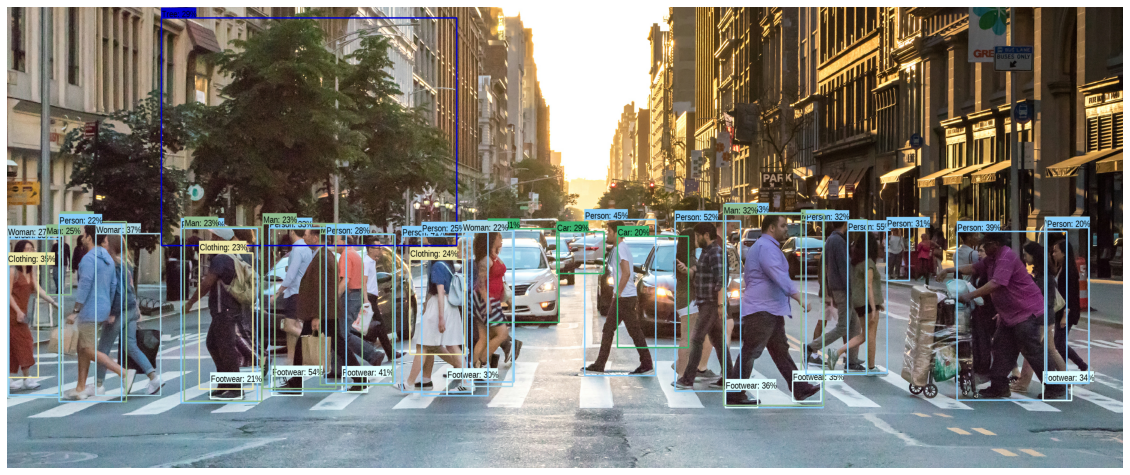

In [27]:
run_detector(detector, '/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/pedestrian-05.jpg', max_boxes=9999, max_score=0.2)

In [28]:
pic1 = cv2.imread("/content/drive/MyDrive/Enhanced_ComputerVision/ThucHanh/Lab_2/images/pedestrian-05.jpg")
result1 = model(cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB))
result1.print()
result1.show()

Output hidden; open in https://colab.research.google.com to view.